# Analyse reindexation from ABES - April 2023

# Set project

### Packages

In [1]:
# Import librairies
import os
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings



from utils_metrics import *
from utils_visualization import *

2023-05-16 12:24:45.689037: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-16 12:24:46.124133: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-16 12:24:46.563254: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-16 12:24:46.563552: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GP

In [2]:
# Suppression des FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

### Graphical parameters

In [3]:
# Parametres graphiques
%matplotlib inline
rcParams = {
    'font.size': 14,
    'font.family':'sans-serif',
    'font.sans-serif':['Liberation Sans'],
    'axes.labelsize': 14,
    'legend.fontsize': 12,
    'axes.titlesize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'figure.max_open_warning': 30}

sns.set(rc=rcParams)
sns.set_style(
    "whitegrid", {
        'axes.edgecolor': 'k',
        'axes.linewidth': 1,
        'axes.grid': True,
        'xtick.major.width': 1,
        'ytick.major.width': 1
        })

sns.set_context(
    "notebook",
    font_scale=1.1,
    rc={"lines.linewidth": 1.5})

pd.set_option('display.max_columns', None)

### Paths

In [4]:
# Set paths
path = "."
os.chdir(path)
data_path = path + "/data"
data_path_reindex = "/home/aurelie/ABES/labo-indexation-ai/data/reindexation/avril2023"
output_path = path + "/outputs"
fig_path = path + "/figs"

# Import data

In [5]:
# Original dataset
dataset = "working_data_sans_dewey.pkl"
rameau_file = "./extraction/liste_concepts_rameau_sans_vedetteConstruites.csv"

In [6]:
# list files
file_list = os.listdir(data_path_reindex)
file_list

['100 NOTICES A INDEXER_AFE.xlsx',
 '100 NOTICES A INDEXER-MCR.xlsx',
 '100 NOTICES A INDEXER - JMF.xlsx',
 '100 NOTICES A INDEXER_LPL.xlsx',
 '100 NOTICES A INDEXER.xlsx',
 '100 NOTICES A INDEXER-LJZ.xlsx',
 '100_notices.xlsx',
 '150_notices.xlsx',
 'ppn_echantillon_150notices.csv',
 '100 NOTICES A INDEXER_MPD.xlsx',
 'ppn_echantillon_100notices_stratified_on_50_clusters.csv']

In [7]:
index_file_list = [
    '100 NOTICES A INDEXER_AFE.xlsx',
    '100 NOTICES A INDEXER-MCR.xlsx',
    '100 NOTICES A INDEXER - JMF.xlsx',
    '100 NOTICES A INDEXER_LPL.xlsx',
    '100 NOTICES A INDEXER-LJZ.xlsx',
    '100 NOTICES A INDEXER_MPD.xlsx']

## Check files

In [8]:
# Import rameau list
ram = pd.read_csv(os.path.join(data_path, rameau_file), encoding="latin-1")
print("Nombre de notices différentes: ", ram.shape[0])
ram.head(10)

Nombre de notices différentes:  85876


PPN                                        NOM
0  157992527                                     Kirp?n
1  110140494                        Militaires artistes
2  028492161                         Militaires romains
3  028521757                       Militaires prussiens
4  029895561                                 Sa-skya-pa
5  031875459                     Militaires réunionnais
6  032370083  Construction à l'épreuve de la sécheresse
7  032878117                      Missionnaires suisses
8  034423982                       Militaires ivoiriens
9  034686940                            Outils à métaux

In [9]:
# Import dataset
df = pd.read_pickle(os.path.join(data_path, dataset))
df["PPN"] = df["PPN"].astype(str)
print("Dimension of the dataset: ", df.shape)
df.head()

Dimension of the dataset:  (154508, 9)


PPN                                              TITRE  \
0  000002364                              La culture pour vivre   
1  000014877  La nuit, le jour : essai psychanalytique sur l...   
2  000021857                                 Ruptures, cultures   
3  00002564X                          La révolution structurale   
4  000026352                           La Destruction du temple   

                                              RESUME  \
0  Mort de la culture populaire en France. Mutati...   
1  Discontinuité, latence, rétablissement d’une c...   
2  Il faut imaginer Robinson sur son île, au mome...   
3  Mutations ou crises, les brusques accès de fiè...   
4  Oswald tire sur Kennedy. Jusque-là, c'est bon,...   

                                              RAMEAU   DEWEY  \
0  Culture populaire;Diffusion de la culture;Poli...     840   
1          Complexe de castration;Psychanalyse;Rêves  154.63   
2                                            Culture     840   
3                                     Structuralisme     100   
4  Science-fiction américaine -- Traductions fran...     830   

                                               DESCR  \
0  La culture pour vivre Mort de la culture popul...   
1  La nuit, le jour : essai psychanalytique sur l...   
2  Ruptures, cultures Il faut imaginer Robinson s...   
3  La révolution structurale Mutations ou crises,...   
4  La Destruction du temple Oswald tire sur Kenne...   

   presence_chaine_indexation  \
0                       False   
1                       False   
2                       False   
3                       False   
4                        True   

                                rameau_chaines_index  \
0  [Culture populaire, Diffusion de la culture, P...   
1      [Complexe de castration, Psychanalyse, Rêves]   
2                                          [Culture]   
3                                   [Structuralisme]   
4  [Science-fiction américaine -- Traductions fra...   

                                     rameau_concepts  
0  [Culture populaire, Diffusion de la culture, P...  
1      [Complexe de castration, Psychanalyse, Rêves]  
2                                          [Culture]  
3                                   [Structuralisme]  
4  [Science-fiction américaine, Traductions franç...

In [10]:
# Check import for one file
file = '100 NOTICES A INDEXER.xlsx'
ind = pd.read_excel(
    os.path.join(data_path_reindex, file), 
    sheet_name="Notices à indexer", 
    engine="openpyxl", 
    converters={"PPN": lambda x: str(x)})
ind.head(3)

N°ordre       PPN                                              TITRE  \
0       79    308838  Les sommets de l'État : essai sur l'élite du p...   
1       58   3632806  Les intellectuels sous la Ve République : 1958...   
2       59  47450037                                Bouddha, bouddhisme   

                                              RESUME INDEXATION UNIMARC  \
0  u XIXe siècle à nos jours, l'Etat "fort" à la ...                NaN   
1  Célèbres, influents, on les voit, on en parle ...                NaN   
2  La 4e de couv. indique : "Ce petit livre répon...                NaN   

  INDEXATION AFFICHAGE PUBLIC  
0                         NaN  
1                         NaN  
2                         NaN

In [11]:
file = '100 NOTICES A INDEXER_AFE.xlsx'
ind = pd.read_excel(
    os.path.join(data_path_reindex, file), 
    sheet_name="Notices à indexer", 
    skiprows=lambda x: x == 1, 
    engine="openpyxl", 
    converters={"PPN": lambda x: str(x)})
ind.drop(ind[ind["PPN"].isna()].index, inplace=True) # delete first line corresponding to example
ind["INDEXATION AFFICHAGE PUBLIC"] = ind["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub('\\n$', '', x))
ind["INDEXATION AFFICHAGE PUBLIC"] = ind["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub('^\\n', '', x))
ind["INDEXATION AFFICHAGE PUBLIC"] = ind["INDEXATION AFFICHAGE PUBLIC"].replace("\\n", ';', regex=True)
ind["INDEXATION AFFICHAGE PUBLIC"] = ind["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub(';*$', '', x))
ind["INDEXATION AFFICHAGE PUBLIC"] = ind["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub('^;*', '', x))
ind.head(3)

N°ordre       PPN                                              TITRE  \
0       58   3632806  Les intellectuels sous la Ve République : 1958...   
1       59  47450037                                Bouddha, bouddhisme   
2       65  58296182                         L'homme devant l'incertain   

                                              RESUME  \
0  Célèbres, influents, on les voit, on en parle ...   
1  La 4e de couv. indique : "Ce petit livre répon...   
2  La quatrième de couverture indique : "Réintrod...   

                                  INDEXATION UNIMARC  \
0  606$3027235149$aIntellectuels$3027284948$yFran...   
1                         606$3027321835$aBouddhisme   
2            606$302736576X$aPhilosophie et sciences   

                         INDEXATION AFFICHAGE PUBLIC  
0  Intellectuels -- France‎ -- 1958-.... (5e Répu...  
1                                         Bouddhisme  
2                            Philosophie et sciences

In [12]:
def import_indexation(file):
    df = pd.read_excel(
        os.path.join(data_path_reindex, file), 
        sheet_name="Notices à indexer", 
        engine="openpyxl", 
        converters={"PPN": lambda x: str(x)})
    df.drop(df[df["PPN"].isna()].index, inplace=True) # delete first line corresponding to example
    if "INDEXATION AFFICHAGE PUBLIC" in df.columns:
        if any(pd.isnull(df["INDEXATION AFFICHAGE PUBLIC"])):
            df.loc[pd.isnull(df["INDEXATION AFFICHAGE PUBLIC"]), "INDEXATION AFFICHAGE PUBLIC"] = ''
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub('\\n*$', '', x)) 
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub('^\\n*', '', x))  
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: ';;'.join(x.splitlines())) 
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].replace("\\n", '', regex=True) 
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].replace("\u200e", '', regex=True)
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("^[\s*;\s*]", '', x))
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("[\s*;\s*]$", '', x))
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("Ecologie", 'Écologie', x))
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("Education", 'Éducation', x))
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("Econo", 'Écono', x))
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("Etablissement", 'Établissement', x))
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("Evaluation", 'Évaluation', x))
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("Evolution", 'Évolution', x))
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("Ecrivain", 'Écrivain', x))
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("Etude", 'Étude', x))
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("Energie", 'Énergie', x))
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("Ecoterrorisme", 'Écoterrorisme', x))
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("Ecole", 'École', x))
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("Etat", 'État', x))
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("Eolienne", 'Éolienne', x))    
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("Equipe", 'Équipe', x))         
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("Eco-anxiété", 'Éco-anxiété', x))
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("Epistémologie", 'Épistémologie', x))
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("Extémisme", 'Extrémisme', x))
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("Parimoine", 'Patrimoine', x))
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("Ralation", 'Relation', x))
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("Jusrisprudence", 'Jurisprudence', x))
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("Procéudure", 'Procédure', x))
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("socialisme et écologie", 'Socialisme et écologie', x))
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("Vendrée", 'Vendée', x))    
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("$", '', x))    

    df["PPN"] = df["PPN"].astype(str)
    
    return df
    

In [13]:
ppn_to_check = []
for file in index_file_list:
    print("Dealing with file :", file)
    ind = import_indexation(file)
    check = []

    for ppn in ind["PPN"].astype(str):
        if any(df["PPN"] == ppn):
            #print("PPN matché à la ligne :", df.loc[df["PPN"] == ppn].index)
            check.append(True)
        else: 
            print("Pas de correspondance pour PPN ", ppn)
            check.append(False)
            ppn_to_check.append(ppn)

    print("Verification que tous les PPN matchent: ", all(check))

Dealing with file : 100 NOTICES A INDEXER_AFE.xlsx
Pas de correspondance pour PPN  308838
Pas de correspondance pour PPN  3632806
Pas de correspondance pour PPN  47450037
Pas de correspondance pour PPN  58296182
Pas de correspondance pour PPN  59911174
Pas de correspondance pour PPN  67313493
Pas de correspondance pour PPN  70072973
Pas de correspondance pour PPN  76503909
Pas de correspondance pour PPN  76986152
Pas de correspondance pour PPN  77463560
Pas de correspondance pour PPN  77880560
Pas de correspondance pour PPN  86077368
Verification que tous les PPN matchent:  False
Dealing with file : 100 NOTICES A INDEXER-MCR.xlsx
Pas de correspondance pour PPN  308838
Pas de correspondance pour PPN  3632806
Pas de correspondance pour PPN  47450037
Pas de correspondance pour PPN  58296182
Pas de correspondance pour PPN  59911174
Pas de correspondance pour PPN  67313493
Pas de correspondance pour PPN  70072973
Pas de correspondance pour PPN  76503909
Pas de correspondance pour PPN  76986

In [14]:
ppn_to_correct = list(set(ppn_to_check))
ppn_to_correct

['59911174',
 '47450037',
 '70072973',
 '67313493',
 '58296182',
 '76986152',
 '77463560',
 '3632806',
 '308838',
 '77880560',
 '86077368',
 '76503909']

## Merge files (par les titres)

In [15]:
cols_to_merge = ["PPN", "TITRE", "RESUME", "INDEXATION AFFICHAGE PUBLIC"]

In [16]:
def merge_new_indexation(file1, file2, columns, on="RESUME", how="inner"):
    if isinstance(file1, pd.DataFrame):
        df1 = file1
    else: 
        df1 = import_indexation(file1)
    if isinstance(file2, pd.DataFrame):
        df2 = file2
    else: 
        df2 = import_indexation(file2)
    df_merge = pd.merge(df1, df2[columns], on=on, how=how)
    return df_merge

In [17]:
# Check notices extraction 
index_file = '100 NOTICES A INDEXER.xlsx'
df1 = merge_new_indexation(df, index_file, columns=["PPN", "TITRE", "RESUME", "INDEXATION AFFICHAGE PUBLIC"])
print("Dimension after merge: ", df1.shape)
print("Adequation parfaite entre les titres : ", all(df1["TITRE_x"] == df1["TITRE_y"]))

Dimension after merge:  (101, 12)
Adequation parfaite entre les titres :  False


In [18]:
# Check correspondance
print("Only 1 notice per PPN for x: ", all(df1.groupby("PPN_x")["TITRE_x"].count() == 1))
print("Only 1 notice per PPN for y: ", all(df1.groupby("PPN_y")["TITRE_y"].count() == 1))

Only 1 notice per PPN for x:  True
Only 1 notice per PPN for y:  False


In [19]:
# Check for y
df1.groupby("PPN_y")["TITRE_y"].count().sort_values(ascending=False)

PPN_y
237131560    2
00094758X    1
249549492    1
258740043    1
257936432    1
            ..
198384122    1
197101267    1
196122708    1
196109590    1
86077368     1
Name: TITRE_y, Length: 100, dtype: int64

In [20]:
# Check errors
df1.loc[df1["PPN_y"] == "237131560", ["PPN_x", "TITRE_x", "PPN_y", "TITRE_y"]]

PPN_x                                       TITRE_x      PPN_y  \
66  237131560  Maths [concours 2020] : admissibilité, écrit  237131560   
67  248611895  Maths : concours 2021 : admissibilité, écrit  237131560   

                                         TITRE_y  
66  Maths [concours 2020] : admissibilité, écrit  
67  Maths [concours 2020] : admissibilité, écrit

==> 2 notices corresponding to the same notice in réindexation

In [21]:
# Check errors
df.loc[df["PPN"] == "237131560", ["PPN", "TITRE", "RESUME"]]

PPN                                         TITRE  \
106783  237131560  Maths [concours 2020] : admissibilité, écrit   

                                                   RESUME  
106783  Une préparation à l'épreuve d'admissibilité de...

In [22]:
# Merge notices indexation
index_columns = []
for file in index_file_list:
    name = file[-8:-5]
    print("Dealing with :", name)
    df = merge_new_indexation(df, file, columns=cols_to_merge)
    col_name = str("INDEX_" + name)
    df.rename(columns={"INDEXATION AFFICHAGE PUBLIC": col_name}, inplace=True)
    print("Dimension after merge: ", df.shape)
    index_columns.append(col_name)


Dealing with : AFE
Dimension after merge:  (101, 12)
Dealing with : MCR
Dimension after merge:  (101, 15)
Dealing with : JMF
Dimension after merge:  (101, 18)
Dealing with : LPL
Dimension after merge:  (101, 21)
Dealing with : LJZ
Dimension after merge:  (100, 24)
Dealing with : MPD
Dimension after merge:  (100, 27)


In [23]:
# Check merging
df.head(5)

PPN_x                                            TITRE_x  \
0  000308838  Les sommets de l'État : essai sur l'élite du p...   
1  00094758X                                          Le dollar   
2  003632806  Les intellectuels sous la Ve République : 1958...   
3  047450037                                Bouddha, bouddhisme   
4  05224170X  Apprendre à aimer les mathématiques : conditio...   

                                              RESUME  \
0  u XIXe siècle à nos jours, l'Etat "fort" à la ...   
1  La quatrième de couverture indique : "Quelle e...   
2  Célèbres, influents, on les voit, on en parle ...   
3  La 4e de couv. indique : "Ce petit livre répon...   
4  Les entretiens d'élèves et d'enseignants, anal...   

                                              RAMEAU  DEWEY  \
0  Bureaucratie;Classes dirigeantes;Classes dirig...          
1  Dollar américain;Finances internationales;Poli...    320   
2               Intellectuels;Intellectuels français    301   
3                                         Bouddhisme  294.3   
4  Mathématiques -- Étude et enseignement -- Aspe...    370   

                                               DESCR  \
0  Les sommets de l'État : essai sur l'élite du p...   
1  Le dollar La quatrième de couverture indique :...   
2  Les intellectuels sous la Ve République : 1958...   
3  Bouddha, bouddhisme La 4e de couv. indique : "...   
4  Apprendre à aimer les mathématiques : conditio...   

   presence_chaine_indexation  \
0                       False   
1                       False   
2                       False   
3                       False   
4                        True   

                                rameau_chaines_index  \
0  [Bureaucratie, Classes dirigeantes, Classes di...   
1  [Dollar américain, Finances internationales, P...   
2            [Intellectuels, Intellectuels français]   
3                                       [Bouddhisme]   
4  [Mathématiques -- Étude et enseignement -- Asp...   

                                     rameau_concepts      PPN_y  \
0  [Bureaucratie, Classes dirigeantes, Classes di...     308838   
1  [Dollar américain, Finances internationales, P...  00094758X   
2            [Intellectuels, Intellectuels français]    3632806   
3                                       [Bouddhisme]   47450037   
4  [Mathématiques, Étude et enseignement, Aspect ...  05224170X   

                                             TITRE_y  \
0  Les sommets de l'État : essai sur l'élite du p...   
1                                          Le dollar   
2  Les intellectuels sous la Ve République : 1958...   
3                                Bouddha, bouddhisme   
4  Apprendre à aimer les mathématiques : conditio...   

                                           INDEX_AFE      PPN_x  \
0  Classes dirigeantes -- France -- Histoire;;Pou...     308838   
1  Dollar américain;;Eurodollar, Marché de l';;Po...  00094758X   
2  Intellectuels -- France -- 1958-.... (5e Répub...    3632806   
3                                         Bouddhisme   47450037   
4  Mathématiques -- Étude et enseignement;;Psycho...  05224170X   

                                             TITRE_x  \
0  Les sommets de l'État : essai sur l'élite du p...   
1                                          Le dollar   
2  Les intellectuels sous la Ve République : 1958...   
3                                Bouddha, bouddhisme   
4  Apprendre à aimer les mathématiques : conditio...   

                                           INDEX_MCR      PPN_y  \
0  Pouvoir (sciences sociales) -- Classes dirigea...  000308838   
1  Dollar américain -- Mondialisation;;Dollar amé...  00094758X   
2                    Intellectuels -- France -- 1945  003632806   
3                                         Bouddhisme  047450037   
4  Mathématiques -- Enfants en difficulté d'appre...  05224170X   

                                             TITRE_y  \
0  Les sommets de l'État : essai sur l'élite du p...   
1                   

In [24]:
df.shape

(100, 27)

# Analyse RAMEAU concepts

In [25]:
index_columns

['INDEX_AFE', 'INDEX_MCR', 'INDEX_JMF', 'INDEX_LPL', 'INDEX_LJZ', 'INDEX_MPD']

## Number of Indexation chains

In [26]:
df["nb_chaine_index_rameau"] = df["RAMEAU"].apply(lambda x: 0 if isinstance(x,float) else len(x.split(";")))
for col in index_columns:
    print("Dealing with ", col)
    index_name = col.split("_")[1]
    new_col_name = str("nb_chaine_index_" + index_name)
    df[new_col_name] = df[col].apply(lambda x: 0 if isinstance(x,float) else len(x.split(";;")))

Dealing with  INDEX_AFE
Dealing with  INDEX_MCR
Dealing with  INDEX_JMF
Dealing with  INDEX_LPL
Dealing with  INDEX_LJZ
Dealing with  INDEX_MPD


In [27]:
# Count nb of chain
cols = [
    "nb_chaine_index_rameau",
    "nb_chaine_index_AFE",
    "nb_chaine_index_MCR",
    "nb_chaine_index_JMF",
    "nb_chaine_index_LPL",
    "nb_chaine_index_LJZ",
    "nb_chaine_index_MPD"]

In [28]:
subset = df[cols].melt()
subset

variable  value
0    nb_chaine_index_rameau      7
1    nb_chaine_index_rameau      3
2    nb_chaine_index_rameau      2
3    nb_chaine_index_rameau      1
4    nb_chaine_index_rameau      4
..                      ...    ...
695     nb_chaine_index_MPD      3
696     nb_chaine_index_MPD      3
697     nb_chaine_index_MPD      3
698     nb_chaine_index_MPD      1
699     nb_chaine_index_MPD      1

[700 rows x 2 columns]

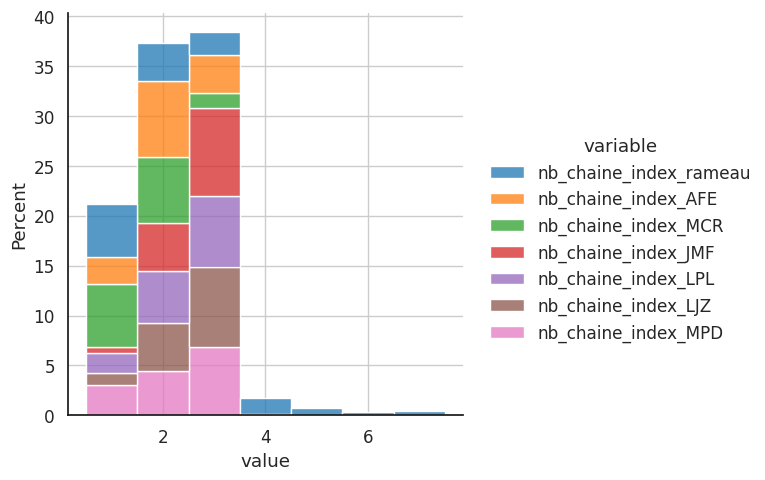

In [29]:
# Number of indexation chain
sns.displot(x="value", hue="variable", data=subset, palette="tab10", discrete=True, stat="percent", multiple="stack")

In [30]:
c = ["PPN", "TITRE", "RAMEAU"] + cols + index_columns

In [31]:
## Check for notices with more than a threshold
thres = 4
mask = df[cols] >= thres
high_nb_index_chain = df.loc[mask.sum(axis=1) >= 1, c]

In [32]:
high_nb_index_chain

PPN                                              TITRE  \
0   000308838  Les sommets de l'État : essai sur l'élite du p...   
4   05224170X  Apprendre à aimer les mathématiques : conditio...   
5   058296182                         L'homme devant l'incertain   
12  077880560  Etude du vascular endothelial growth factor (V...   
16  126056536       Tennis : soyez P.R.O. : la méthode pour oser   
22  159761875  Les sociétés coloniales à l'âge des empires : ...   
24  163093741  Le cri d'Archimède : l'art de la Découverte et...   
28  181543656  Israël entre quatre murs : la politique sécuri...   
31  183201523  L'habitat du Néolithique ancien de Colombelles...   
44  200404342  La fabrique des classiques africains : écrivai...   
55  231860838                              La justice prédictive   
67  237156989      Le photojournalisme peut-il sauver la presse    
71  248194305                                 Le travail du care   
80  255264887  Épreuves écrites du CRFPA : spécialité droit p...   
82  257349006  Vivre plus simplement : analyse sociologique d...   
83  257504990                             La nouvelle économique   
86  26117309X  Monde enchanté : chansons et imaginaires géogr...   
87  261199609  Grosse, et alors  : connaître et combattre la ...   
89  262267888  Ce que les GAFAM font aux médias africains : e...   
91  263439038  Jouer, rêver, inventer... : la créativité à l'...   
96  26753177X  Algocratie : allons-nous donner le pouvoir aux...   

                                               RAMEAU  nb_chaine_index_rameau  \
0   Bureaucratie;Classes dirigeantes;Classes dirig...                       7   
4   Mathématiques -- Étude et enseignement -- Aspe...                       4   
5   Chaos (théorie des systèmes);Incertitude;Libre...                       7   
12  Facteur de croissance des cellules endothélial...                       4   
16  Performance (sports);Tennis -- Aspect psycholo...                       4   
22  Colonies;Colonies;Colonies;Colonisation -- Asp...                       7   
24  Créativité;Créativité en sciences;Découvertes ...                       5   
28  Conflit israélo-arabe;Menaces;Relations milita...                       4   
31  Antiquités;Culture à céramique linéaire;Fouill...                       4   
44  Littérature africaine de langue française -- A...                       5   
55  Droit -- Informatique -- Aspect moral;Droit et...                       5   
67  Journalisme électronique;Photographes de press...                       4   
71  Aides-soignants -- Conditions de travail;Compo...                       5   
80  Droit pénal;Obligations (droit);Procédure péna...                       4   
82  Auto-développement (psychothérapie);Changement...                       6   
83  Cycles économiques;Planification économique;Éc...                       4   
86  Chansons -- Art d'écrire -- Géographie;Géograp...                       4   
87  Corps humain -- Aspect social;Discrimination;G...                       4   
89  Diffusion sélective de l'information;Géants du...                       6   
91  Créativité (éducation);Créativité -- Chez l'en...                       4   
96  Algorithmes;Changement social;Informatique -- ...                       5   

    nb_chaine_index_AFE  nb_chaine_index_MCR  nb_chaine_index_JMF  \
0                     2                    2                    3   
4                     3                    2                    3   
5                     1                    1                    3   
12                    2                    1                    3   
16                    2                    1                    3   
22                    2                    2                    3   
24                    3                    2                    3   
28                    3                    2                    3   
31                    3                    2                    3   
44                    3                 

## Get all concepts

In [33]:
ram

PPN                              NOM
0      157992527                           Kirp?n
1      110140494              Militaires artistes
2      028492161               Militaires romains
3      028521757             Militaires prussiens
4      029895561                       Sa-skya-pa
...          ...                              ...
85871  191405949  Relations artistes-collectivité
85872  234777605         Postcolonialisme et arts
85873  193907445                           Ascèse
85874  027415074                   Vie chrétienne
85875  140430431                 Loisirs créatifs

[85876 rows x 2 columns]

In [34]:
# Mettre à plat TOUS les mots clé
pattern = r';;\s*(?![^()$]*\))| -- |-- | --|--| - '

for col in index_columns:
    name = col.split("_")[1]
    print("Dealing with: ", name)
    new_col = str('rameau_concept_' + name)
    df[new_col] = df[col].apply(lambda x: re.split(pattern, str(x)))


Dealing with:  AFE
Dealing with:  MCR
Dealing with:  JMF
Dealing with:  LPL
Dealing with:  LJZ
Dealing with:  MPD


In [35]:
df.head(3)

PPN_x                                            TITRE_x  \
0  000308838  Les sommets de l'État : essai sur l'élite du p...   
1  00094758X                                          Le dollar   
2  003632806  Les intellectuels sous la Ve République : 1958...   

                                              RESUME  \
0  u XIXe siècle à nos jours, l'Etat "fort" à la ...   
1  La quatrième de couverture indique : "Quelle e...   
2  Célèbres, influents, on les voit, on en parle ...   

                                              RAMEAU DEWEY  \
0  Bureaucratie;Classes dirigeantes;Classes dirig...         
1  Dollar américain;Finances internationales;Poli...   320   
2               Intellectuels;Intellectuels français   301   

                                               DESCR  \
0  Les sommets de l'État : essai sur l'élite du p...   
1  Le dollar La quatrième de couverture indique :...   
2  Les intellectuels sous la Ve République : 1958...   

   presence_chaine_indexation  \
0                       False   
1                       False   
2                       False   

                                rameau_chaines_index  \
0  [Bureaucratie, Classes dirigeantes, Classes di...   
1  [Dollar américain, Finances internationales, P...   
2            [Intellectuels, Intellectuels français]   

                                     rameau_concepts      PPN_y  \
0  [Bureaucratie, Classes dirigeantes, Classes di...     308838   
1  [Dollar américain, Finances internationales, P...  00094758X   
2            [Intellectuels, Intellectuels français]    3632806   

                                             TITRE_y  \
0  Les sommets de l'État : essai sur l'élite du p...   
1                                          Le dollar   
2  Les intellectuels sous la Ve République : 1958...   

                                           INDEX_AFE      PPN_x  \
0  Classes dirigeantes -- France -- Histoire;;Pou...     308838   
1  Dollar américain;;Eurodollar, Marché de l';;Po...  00094758X   
2  Intellectuels -- France -- 1958-.... (5e Répub...    3632806   

                                             TITRE_x  \
0  Les sommets de l'État : essai sur l'élite du p...   
1                                          Le dollar   
2  Les intellectuels sous la Ve République : 1958...   

                                           INDEX_MCR      PPN_y  \
0  Pouvoir (sciences sociales) -- Classes dirigea...  000308838   
1  Dollar américain -- Mondialisation;;Dollar amé...  00094758X   
2                    Intellectuels -- France -- 1945  003632806   

                                             TITRE_y  \
0  Les sommets de l'État : essai sur l'élite du p...   
1                                          Le dollar   
2  Les intellectuels sous la Ve République : 1958...   

                                           INDEX_JMF      PPN_x  \
0  Classes dirigeantes -- Relations avec l'État -...     308838   
1  Dollar américain ;;Politique économique -- Éta...  00094758X   
2  Intellectuels français -- Sociologie ;;Intelle...    3632806   

                                             TITRE_x  \
0  Les sommets de l'État : essai sur l'élite du p...   
1                                          Le dollar   
2  Les intellectuels sous la Ve République : 1958...   

                                           INDEX_LPL      PPN_y  \
0  Hauts fonctionnaires -- France;;Classes dirige...     308838   
1  Dollar américain -- Influence -- 20e siècle;;F...  00094758X   
2  Intellectuels -- France -- 1958 (5e République...    3632806   

                                             TITRE_y  \
0  Les sommets de l'État : essai sur l'élite du p...   
1                                          Le dollar   
2  Les intellectuels sous la Ve République : 1958...   

                                           INDEX_LJZ        PPN  \
0  Classes dirigeantes -- France;;Hauts fonctionn...  000308838   
1  Dollar américain;;Eurodollar, Marché de l';;Fi...  00094758X   
2  Intelle

## Format data

In [36]:
df.columns

Index(['PPN_x', 'TITRE_x', 'RESUME', 'RAMEAU', 'DEWEY', 'DESCR',
       'presence_chaine_indexation', 'rameau_chaines_index', 'rameau_concepts',
       'PPN_y', 'TITRE_y', 'INDEX_AFE', 'PPN_x', 'TITRE_x', 'INDEX_MCR',
       'PPN_y', 'TITRE_y', 'INDEX_JMF', 'PPN_x', 'TITRE_x', 'INDEX_LPL',
       'PPN_y', 'TITRE_y', 'INDEX_LJZ', 'PPN', 'TITRE', 'INDEX_MPD',
       'nb_chaine_index_rameau', 'nb_chaine_index_AFE', 'nb_chaine_index_MCR',
       'nb_chaine_index_JMF', 'nb_chaine_index_LPL', 'nb_chaine_index_LJZ',
       'nb_chaine_index_MPD', 'rameau_concept_AFE', 'rameau_concept_MCR',
       'rameau_concept_JMF', 'rameau_concept_LPL', 'rameau_concept_LJZ',
       'rameau_concept_MPD'],
      dtype='object')

In [37]:
col_to_keep = ["PPN", "rameau_concepts", "rameau_concept_AFE",
               "rameau_concept_MCR", "rameau_concept_JMF",
                "rameau_concept_LPL", "rameau_concept_LJZ", "rameau_concept_MPD"]
df_pivot = pd.melt(df[col_to_keep], id_vars=["PPN"])
df_pivot

PPN            variable  \
0    000308838     rameau_concepts   
1    00094758X     rameau_concepts   
2    003632806     rameau_concepts   
3    047450037     rameau_concepts   
4    05224170X     rameau_concepts   
..         ...                 ...   
695  266197809  rameau_concept_MPD   
696  26753177X  rameau_concept_MPD   
697  267884575  rameau_concept_MPD   
698  268799458  rameau_concept_MPD   
699  268924759  rameau_concept_MPD   

                                                 value  
0    [Bureaucratie, Classes dirigeantes, Classes di...  
1    [Dollar américain, Finances internationales, P...  
2              [Intellectuels, Intellectuels français]  
3                                         [Bouddhisme]  
4    [Mathématiques, Étude et enseignement, Aspect ...  
..                                                 ...  
695  [Féodalité, Histoire, Valence-en-Brie (Seine-e...  
696  [Société numérique, Algorithmes, Utilisation, ...  
697  [Capitalisme, Critique et interprétation, Dési...  
698                                  [Co-enseignement]  
699                            [Jardinage d'intérieur]  

[700 rows x 3 columns]

In [38]:
labels=df_pivot["value"]
labels

0      [Bureaucratie, Classes dirigeantes, Classes di...
1      [Dollar américain, Finances internationales, P...
2                [Intellectuels, Intellectuels français]
3                                           [Bouddhisme]
4      [Mathématiques, Étude et enseignement, Aspect ...
                             ...                        
695    [Féodalité, Histoire, Valence-en-Brie (Seine-e...
696    [Société numérique, Algorithmes, Utilisation, ...
697    [Capitalisme, Critique et interprétation, Dési...
698                                    [Co-enseignement]
699                              [Jardinage d'intérieur]
Name: value, Length: 700, dtype: object

In [39]:
def flatten(list):
    flat_list = [item for sublist in list for item in sublist]
    return flat_list

In [40]:
keywords = flatten(labels)
print(f"Le dataset contient {len(set(keywords))} concepts RAMEAU differents")

Le dataset contient 966 concepts RAMEAU differents


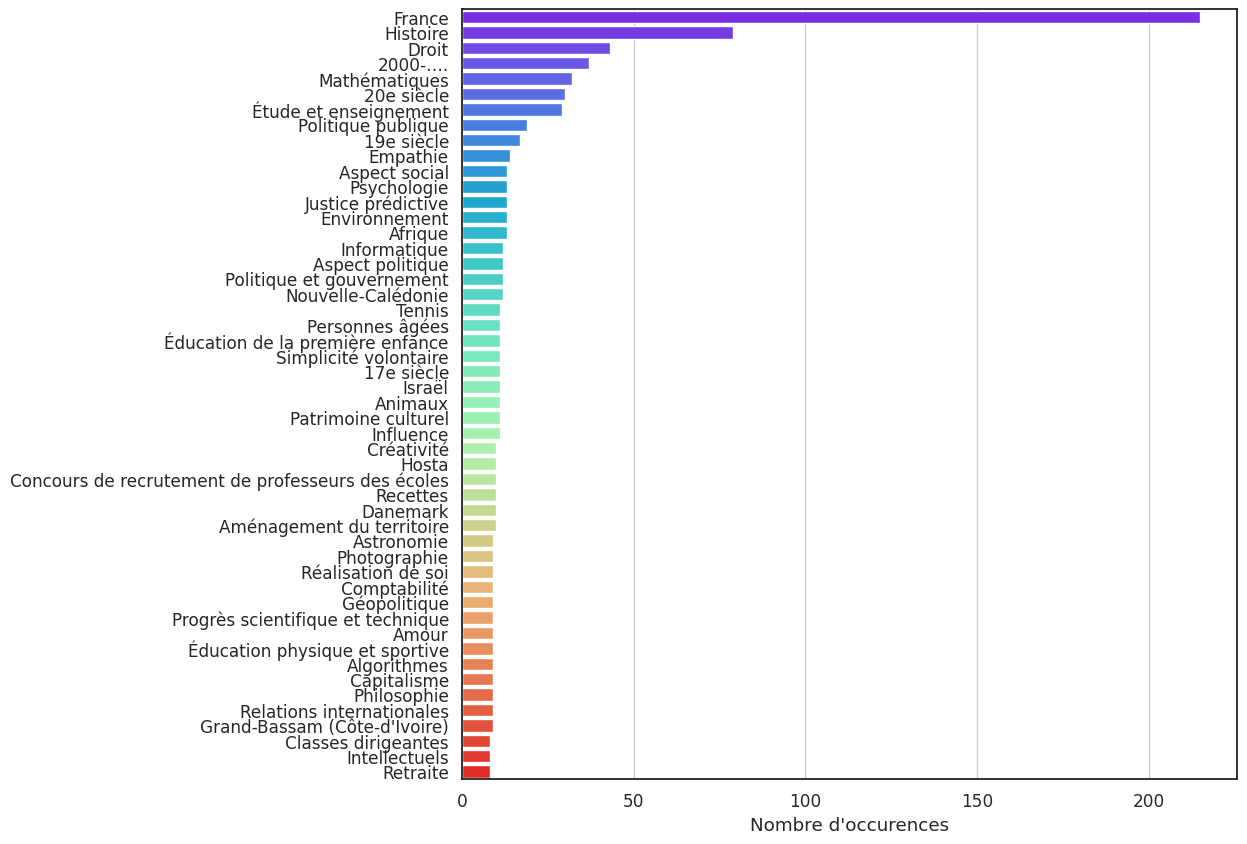

In [41]:
plot_barplot_of_tags(
    keywords,
    nb_of_tags=50,
    xlabel="Nombre d'occurences",
    ylabel="",
    figsave="barplot_concept_reindexation.png",
    figsize=(10, 10),
    palette="rainbow",
    orient="h",
)

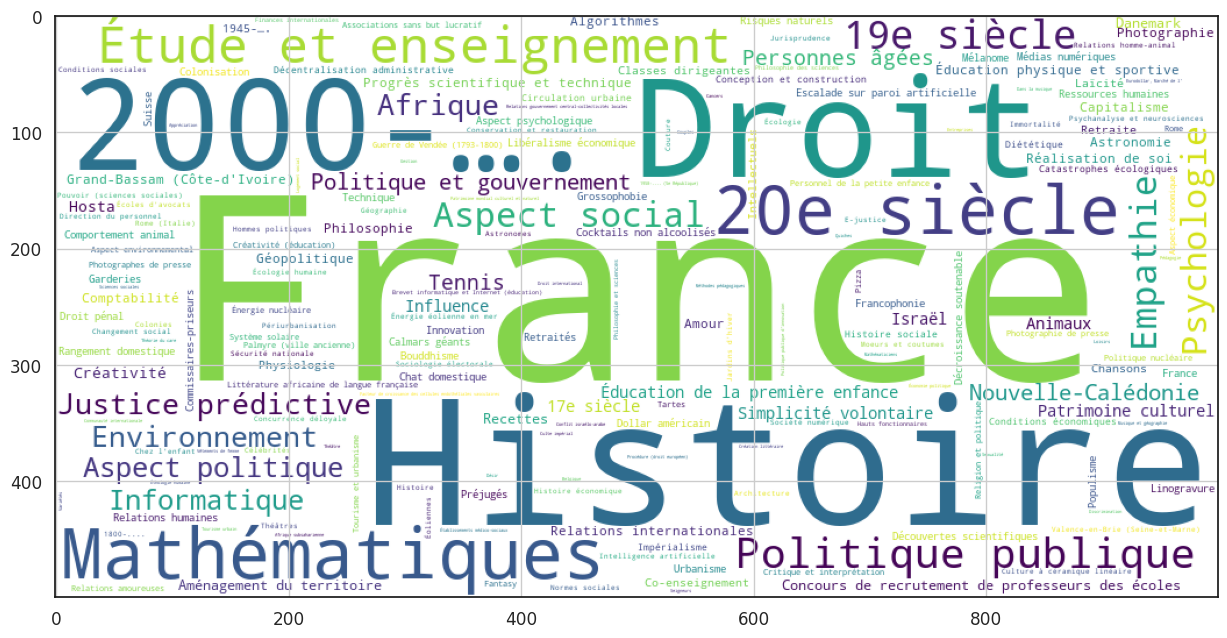

In [42]:
plot_wordcloud(
    keywords,
    backgound_color="white",
    figsize=(15, 8),
    width=1000,
    height=500,
    save_file="wordcloud_reindexation.png",
)

In [43]:
all_concepts = df["rameau_concepts"] + df["rameau_concept_AFE"] + df["rameau_concept_MCR"] + df["rameau_concept_JMF"] + df["rameau_concept_LPL"] + df["rameau_concept_LJZ"]	+ df["rameau_concept_MPD"]
keywords2 = flatten(all_concepts)
print(f"Le dataset contient {len(set(keywords2))} concepts RAMEAU differents")

Le dataset contient 966 concepts RAMEAU differents


In [44]:
# Verification que toutes les vedettes appartiennent au referenciel RAMEAU
RAMEAU = ram["NOM"].to_list()
keywords = list(map(lambda x: x.lstrip().rstrip(), keywords)) 
if all([item in RAMEAU for item in keywords]):
    print("Tous les mots clés sont des concepts rameau")
else:
    check = [item in RAMEAU for item in keywords]
    bad_keywords = []
    for i in range(len(check)):
        if not check[i]:
            bad_keywords.append(keywords[i])
 
    unknown_concepts = list(set(bad_keywords))
    print(f"{len(unknown_concepts)} mots clés absents du répertoire RAMEAU sur un total de {len(set(keywords))}")

186 mots clés absents du répertoire RAMEAU sur un total de 908


In [45]:
# Save list of badly formatted concepts, for check
with open(os.path.join(data_path, "concepts_a_verifier.txt"), "w") as output:
    output.write(str(unknown_concepts))
unknown_concepts

['',
 'Guerre de Vendée',
 'Classicisme (Littérature)',
 'Grand-Bassam',
 'Récits personnnels',
 'Performances (sport)',
 '1988-....',
 'Aspect cognitif',
 'Littérature',
 '1945',
 '19e siècle',
 'Nouvelle de science-fiction',
 '1800-...',
 'Conflit isréalo-arabe',
 'Art, commerce',
 'France',
 'Ethologie',
 'Vendée',
 'Histoire et fiction',
 'Cancers',
 'Méthodes pédagogiques',
 'collectivités locales',
 'Récits de voyages',
 '1800-....',
 'Le Lazzaro  (Calvados ; site archéologique)',
 'Mythes',
 'Géants du web',
 '1945-2000',
 '1800-…',
 'Centres médico-psychopédagogiques',
 'Avant 1500',
 'Israël',
 'Sport',
 "Professeurs d'éducation",
 'Littérature africaine de langue anglaise',
 'Thèses et écrits académiques',
 '1900-1945',
 'Photographies de presse',
 'URSS',
 'Patrons (couture)',
 'Facteurs humains',
 "Grand-Bassam (Côté d'Ivoire",
 'Escrocs et escroquerie',
 "Travaux d'aiguille",
 "Angers, Massacres d'(1793-1794)",
 'Innovations technologiques',
 'Classe populaire',
 '1990-202

In [46]:
print(labels[0])
print(all_concepts[0])

['Bureaucratie', 'Classes dirigeantes', 'Classes dirigeantes', 'Hauts fonctionnaires', 'Hommes politiques', 'Pouvoir (sciences sociales)', 'Pratiques politiques']
['Bureaucratie', 'Classes dirigeantes', 'Classes dirigeantes', 'Hauts fonctionnaires', 'Hommes politiques', 'Pouvoir (sciences sociales)', 'Pratiques politiques', 'Classes dirigeantes', 'France', 'Histoire', 'Pouvoir communautaire', 'France', 'Pouvoir (sciences sociales)', 'Classes dirigeantes ', 'Élite (sciences sociales)', 'Hauts fonctionnaires', 'Classes dirigeantes', "Relations avec l'État", 'France  ', 'Construction nationale', 'France ', 'Leadership politique', 'France', 'Histoire', 'Hauts fonctionnaires', 'France', 'Classes dirigeantes', 'France', '19e siècle', 'Classes dirigeantes', 'France', '20e siècle', 'Classes dirigeantes', 'France', 'Hauts fonctionnaires', 'France', 'Relations gouvernement central-collectivités locales', 'France', 'Classes dirigeantes', 'France', 'Histoire', 'Élite (sciences sociales)', 'Hauts f

# Multilabel classification

## By Concepts

In [47]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

In [48]:
# Binarization
concepts = mlb.fit_transform(all_concepts) # all_concepts
concepts

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [49]:
sudoc = mlb.transform(df["rameau_concepts"])
afe = mlb.transform(df["rameau_concept_AFE"])
mcr = mlb.transform(df["rameau_concept_MCR"])
jmf = mlb.transform(df["rameau_concept_JMF"])
lpl = mlb.transform(df["rameau_concept_LPL"])
ljz = mlb.transform(df["rameau_concept_LJZ"])
mpd = mlb.transform(df["rameau_concept_MPD"])

In [50]:
from itertools import combinations_with_replacement

concept_list = [sudoc, afe, mcr, jmf, lpl, ljz, mpd]
index_name = ["sudoc", "afe", "mcr", "jmf", "lpl", "ljz", "mpd"]
results = dict()

for names, concept in zip(list(combinations_with_replacement(index_name, 2)), list(combinations_with_replacement(concept_list, 2))):
    print(f"comparing {names[0]} and  {names[1]}")
    name = str(names[0] + '-' + names[1])
    results[name] = label_metrics_report("reindexation_concepts", concept[0], concept[1], zero_division=0)

comparing sudoc and  sudoc
comparing sudoc and  afe
comparing sudoc and  mcr
comparing sudoc and  jmf
comparing sudoc and  lpl
comparing sudoc and  ljz
comparing sudoc and  mpd
comparing afe and  afe
comparing afe and  mcr
comparing afe and  jmf
comparing afe and  lpl
comparing afe and  ljz
comparing afe and  mpd
comparing mcr and  mcr
comparing mcr and  jmf
comparing mcr and  lpl
comparing mcr and  ljz
comparing mcr and  mpd
comparing jmf and  jmf
comparing jmf and  lpl
comparing jmf and  ljz
comparing jmf and  mpd
comparing lpl and  lpl
comparing lpl and  ljz
comparing lpl and  mpd
comparing ljz and  ljz
comparing ljz and  mpd
comparing mpd and  mpd


### Dataframe of results

In [51]:
result_df = pd.DataFrame(results).T
result_df

Hamming Loss Accuracy Precision - Macro Recall - Macro  \
sudoc-sudoc          0.0      1.0          0.250518       0.250518   
sudoc-afe       0.004234     0.05          0.087336       0.090074   
sudoc-mcr       0.004472     0.03          0.073381       0.073598   
sudoc-jmf       0.005445     0.03          0.081969       0.082508   
sudoc-lpl       0.004275     0.05          0.102722       0.102706   
sudoc-ljz       0.005052     0.01          0.069575       0.068878   
sudoc-mpd       0.003872     0.09          0.120114       0.122572   
afe-afe              0.0      1.0          0.274327       0.274327   
afe-mcr         0.004731     0.05          0.089685        0.08529   
afe-jmf         0.005145     0.04          0.106796       0.106753   
afe-lpl         0.004161     0.03          0.112602       0.113559   
afe-ljz         0.004172     0.01          0.118932        0.11866   
afe-mpd         0.003509      0.1           0.14544       0.143933   
mcr-mcr              0.0      1.0          0.296066       0.296066   
mcr-jmf         0.005631     0.01          0.093154        0.09549   
mcr-lpl         0.004876      0.0          0.091523       0.091911   
mcr-ljz         0.005155      0.0          0.085396       0.086128   
mcr-mpd         0.004576     0.05          0.108935       0.112659   
jmf-jmf              0.0      1.0          0.376812       0.376812   
jmf-lpl         0.005518     0.03          0.099289       0.099101   
jmf-ljz         0.005776     0.01          0.092682       0.093401   
jmf-mpd         0.005238     0.03          0.115887       0.117107   
lpl-lpl              0.0      1.0          0.289855       0.289855   
lpl-ljz         0.004876     0.01          0.095238       0.095655   
lpl-mpd         0.003965     0.08          0.129834        0.13137   
ljz-ljz              0.0      1.0          0.306418       0.306418   
ljz-mpd         0.004658     0.02          0.108514       0.110963   
mpd-mpd              0.0      1.0          0.304348       0.304348   

            F1_Score - Macro Jaccard - Macro Precision - Sample  \
sudoc-sudoc         0.250518        0.250518                1.0   
sudoc-afe           0.087714        0.085073           0.348952   
sudoc-mcr            0.07236        0.069617           0.299929   
sudoc-jmf           0.081259        0.079384           0.251238   
sudoc-lpl           0.101311        0.099321           0.349667   
sudoc-ljz           0.067916        0.065659           0.233429   
sudoc-mpd           0.119628        0.116658           0.430095   
afe-afe             0.274327        0.274327                1.0   
afe-mcr             0.085927        0.083157           0.347881   
afe-jmf              0.10546        0.102238           0.347369   
afe-lpl             0.111054        0.107188              0.441   
afe-ljz              0.11737        0.114134           0.409405   
afe-mpd             0.142341        0.137019           0.559333   
mcr-mcr             0.296066        0.296066                1.0   
mcr-jmf              0.09241        0.089534           0.285429   
mcr-lpl             0.089783        0.087002             0.3225   
mcr-ljz               0.0846        0.082795              0.291   
mcr-mpd             0.108541         0.10493           0.396762   
jmf-jmf             0.376812        0.376812                1.0   
jmf-lpl             0.097014          0.0935             0.3795   
jmf-ljz             0.092193         0.08989           0.338048   
jmf-mpd             0.114339        0.110065           0.442095   
lpl-lpl             0.289855        0.289855                1.0   
lpl-ljz             0.094315        0.091649           0.359262   
lpl-mpd             0.128785        0.125224            0.52219   
ljz-ljz             0.306418        0.306418                1.0   
ljz-mpd             0.107539         0.10334           0.424333   
mpd-mpd             0.304348        0.304348                1.0   

            Recall - Sample F1_Score 

In [52]:
# Get max score
result_df.sort_values(by="Hamming Loss")

Hamming Loss Accuracy Precision - Macro Recall - Macro  \
sudoc-sudoc          0.0      1.0          0.250518       0.250518   
ljz-ljz              0.0      1.0          0.306418       0.306418   
lpl-lpl              0.0      1.0          0.289855       0.289855   
jmf-jmf              0.0      1.0          0.376812       0.376812   
afe-afe              0.0      1.0          0.274327       0.274327   
mcr-mcr              0.0      1.0          0.296066       0.296066   
mpd-mpd              0.0      1.0          0.304348       0.304348   
afe-mpd         0.003509      0.1           0.14544       0.143933   
sudoc-mpd       0.003872     0.09          0.120114       0.122572   
lpl-mpd         0.003965     0.08          0.129834        0.13137   
afe-lpl         0.004161     0.03          0.112602       0.113559   
afe-ljz         0.004172     0.01          0.118932        0.11866   
sudoc-afe       0.004234     0.05          0.087336       0.090074   
sudoc-lpl       0.004275     0.05          0.102722       0.102706   
sudoc-mcr       0.004472     0.03          0.073381       0.073598   
mcr-mpd         0.004576     0.05          0.108935       0.112659   
ljz-mpd         0.004658     0.02          0.108514       0.110963   
afe-mcr         0.004731     0.05          0.089685        0.08529   
mcr-lpl         0.004876      0.0          0.091523       0.091911   
lpl-ljz         0.004876     0.01          0.095238       0.095655   
sudoc-ljz       0.005052     0.01          0.069575       0.068878   
afe-jmf         0.005145     0.04          0.106796       0.106753   
mcr-ljz         0.005155      0.0          0.085396       0.086128   
jmf-mpd         0.005238     0.03          0.115887       0.117107   
sudoc-jmf       0.005445     0.03          0.081969       0.082508   
jmf-lpl         0.005518     0.03          0.099289       0.099101   
mcr-jmf         0.005631     0.01          0.093154        0.09549   
jmf-ljz         0.005776     0.01          0.092682       0.093401   

            F1_Score - Macro Jaccard - Macro Precision - Sample  \
sudoc-sudoc         0.250518        0.250518                1.0   
ljz-ljz             0.306418        0.306418                1.0   
lpl-lpl             0.289855        0.289855                1.0   
jmf-jmf             0.376812        0.376812                1.0   
afe-afe             0.274327        0.274327                1.0   
mcr-mcr             0.296066        0.296066                1.0   
mpd-mpd             0.304348        0.304348                1.0   
afe-mpd             0.142341        0.137019           0.559333   
sudoc-mpd           0.119628        0.116658           0.430095   
lpl-mpd             0.128785        0.125224            0.52219   
afe-lpl             0.111054        0.107188              0.441   
afe-ljz              0.11737        0.114134           0.409405   
sudoc-afe           0.087714        0.085073           0.348952   
sudoc-lpl           0.101311        0.099321           0.349667   
sudoc-mcr            0.07236        0.069617           0.299929   
mcr-mpd             0.108541         0.10493           0.396762   
ljz-mpd             0.107539         0.10334           0.424333   
afe-mcr             0.085927        0.083157           0.347881   
mcr-lpl             0.089783        0.087002             0.3225   
lpl-ljz             0.094315        0.091649           0.359262   
sudoc-ljz           0.067916        0.065659           0.233429   
afe-jmf              0.10546        0.102238           0.347369   
mcr-ljz               0.0846        0.082795              0.291   
jmf-mpd             0.114339        0.110065           0.442095   
sudoc-jmf           0.081259        0.079384           0.251238   
jmf-lpl             0.097014          0.0935             0.3795   
mcr-jmf              0.09241        0.089534           0.285429   
jmf-ljz             0.092193         0.08989           0.338048   

            Recall - Sample F1_Score 

### Plot

In [53]:
# Plot results
metrics_radar_plot(
    result_df,
    title="Quantitative comparisons, Scaled, without identity",
    savefig="metrics_reindexation_without_identity.html",)

In [54]:
metrics_radar_plot(
    result_df, 
    remove_identity=False, 
    title="Quantitative comparisons, Scaled, with identity",
    savefig="metrics_reindexation.html",)

/home/aurelie/ABES/labo-indexation-ai/utils_visualization.py:129: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/aurelie/ABES/labo-indexation-ai/utils_visualization.py:130: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## By indexation Chains

### Get indexation chains

In [55]:
# Mettre à plat TOUTES les chaines d'indexation
pattern = r';;\s*(?![^()$]*\))'

for col in index_columns:
    name = col.split("_")[1]
    print("Dealing with: ", name)
    new_col = str('rameau_index_chain_' + name)
    df[new_col] = df[col].apply(lambda x: re.split(pattern, str(x)))


Dealing with:  AFE
Dealing with:  MCR
Dealing with:  JMF
Dealing with:  LPL
Dealing with:  LJZ
Dealing with:  MPD


In [56]:
df.head(3)

PPN_x                                            TITRE_x  \
0  000308838  Les sommets de l'État : essai sur l'élite du p...   
1  00094758X                                          Le dollar   
2  003632806  Les intellectuels sous la Ve République : 1958...   

                                              RESUME  \
0  u XIXe siècle à nos jours, l'Etat "fort" à la ...   
1  La quatrième de couverture indique : "Quelle e...   
2  Célèbres, influents, on les voit, on en parle ...   

                                              RAMEAU DEWEY  \
0  Bureaucratie;Classes dirigeantes;Classes dirig...         
1  Dollar américain;Finances internationales;Poli...   320   
2               Intellectuels;Intellectuels français   301   

                                               DESCR  \
0  Les sommets de l'État : essai sur l'élite du p...   
1  Le dollar La quatrième de couverture indique :...   
2  Les intellectuels sous la Ve République : 1958...   

   presence_chaine_indexation  \
0                       False   
1                       False   
2                       False   

                                rameau_chaines_index  \
0  [Bureaucratie, Classes dirigeantes, Classes di...   
1  [Dollar américain, Finances internationales, P...   
2            [Intellectuels, Intellectuels français]   

                                     rameau_concepts      PPN_y  \
0  [Bureaucratie, Classes dirigeantes, Classes di...     308838   
1  [Dollar américain, Finances internationales, P...  00094758X   
2            [Intellectuels, Intellectuels français]    3632806   

                                             TITRE_y  \
0  Les sommets de l'État : essai sur l'élite du p...   
1                                          Le dollar   
2  Les intellectuels sous la Ve République : 1958...   

                                           INDEX_AFE      PPN_x  \
0  Classes dirigeantes -- France -- Histoire;;Pou...     308838   
1  Dollar américain;;Eurodollar, Marché de l';;Po...  00094758X   
2  Intellectuels -- France -- 1958-.... (5e Répub...    3632806   

                                             TITRE_x  \
0  Les sommets de l'État : essai sur l'élite du p...   
1                                          Le dollar   
2  Les intellectuels sous la Ve République : 1958...   

                                           INDEX_MCR      PPN_y  \
0  Pouvoir (sciences sociales) -- Classes dirigea...  000308838   
1  Dollar américain -- Mondialisation;;Dollar amé...  00094758X   
2                    Intellectuels -- France -- 1945  003632806   

                                             TITRE_y  \
0  Les sommets de l'État : essai sur l'élite du p...   
1                                          Le dollar   
2  Les intellectuels sous la Ve République : 1958...   

                                           INDEX_JMF      PPN_x  \
0  Classes dirigeantes -- Relations avec l'État -...     308838   
1  Dollar américain ;;Politique économique -- Éta...  00094758X   
2  Intellectuels français -- Sociologie ;;Intelle...    3632806   

                                             TITRE_x  \
0  Les sommets de l'État : essai sur l'élite du p...   
1                                          Le dollar   
2  Les intellectuels sous la Ve République : 1958...   

                                           INDEX_LPL      PPN_y  \
0  Hauts fonctionnaires -- France;;Classes dirige...     308838   
1  Dollar américain -- Influence -- 20e siècle;;F...  00094758X   
2  Intellectuels -- France -- 1958 (5e République...    3632806   

                                             TITRE_y  \
0  Les sommets de l'État : essai sur l'élite du p...   
1                                          Le dollar   
2  Les intellectuels sous la Ve République : 1958...   

                                           INDEX_LJZ        PPN  \
0  Classes dirigeantes -- France;;Hauts fonctionn...  000308838   
1  Dollar américain;;Eurodollar, Marché de l';;Fi...  00094758X   
2  Intelle

## Format data

In [57]:
col_to_keep = ["PPN", "rameau_chaines_index", "rameau_index_chain_AFE",
               "rameau_index_chain_MCR", "rameau_index_chain_JMF",
                "rameau_index_chain_LPL", "rameau_index_chain_LJZ", "rameau_index_chain_MPD"]
df_index_chain_pivot = pd.melt(df[col_to_keep], id_vars=["PPN"])
df_index_chain_pivot

PPN                variable  \
0    000308838    rameau_chaines_index   
1    00094758X    rameau_chaines_index   
2    003632806    rameau_chaines_index   
3    047450037    rameau_chaines_index   
4    05224170X    rameau_chaines_index   
..         ...                     ...   
695  266197809  rameau_index_chain_MPD   
696  26753177X  rameau_index_chain_MPD   
697  267884575  rameau_index_chain_MPD   
698  268799458  rameau_index_chain_MPD   
699  268924759  rameau_index_chain_MPD   

                                                 value  
0    [Bureaucratie, Classes dirigeantes, Classes di...  
1    [Dollar américain, Finances internationales, P...  
2              [Intellectuels, Intellectuels français]  
3                                         [Bouddhisme]  
4    [Mathématiques -- Étude et enseignement -- Asp...  
..                                                 ...  
695  [Féodalité -- Histoire -- Valence-en-Brie (Sei...  
696  [Société numérique, Algorithmes -- Utilisation...  
697  [Capitalisme -- Critique et interprétation, Dé...  
698                                  [Co-enseignement]  
699                            [Jardinage d'intérieur]  

[700 rows x 3 columns]

In [58]:
chains=df_index_chain_pivot["value"]
chains

0      [Bureaucratie, Classes dirigeantes, Classes di...
1      [Dollar américain, Finances internationales, P...
2                [Intellectuels, Intellectuels français]
3                                           [Bouddhisme]
4      [Mathématiques -- Étude et enseignement -- Asp...
                             ...                        
695    [Féodalité -- Histoire -- Valence-en-Brie (Sei...
696    [Société numérique, Algorithmes -- Utilisation...
697    [Capitalisme -- Critique et interprétation, Dé...
698                                    [Co-enseignement]
699                              [Jardinage d'intérieur]
Name: value, Length: 700, dtype: object

In [59]:
index_chains = flatten(chains)
print(f"Le dataset contient {len(set(index_chains))} chaines d'indexation differentes")

Le dataset contient 1177 chaines d'indexation differentes


In [60]:
# remove strange characters
index_chains2 = [x.lstrip(r";|''").rstrip(r";|''") for x in index_chains]
print(f"Le dataset contient {len(set(index_chains2))} chaines d'indexation differentes")

Le dataset contient 1177 chaines d'indexation differentes


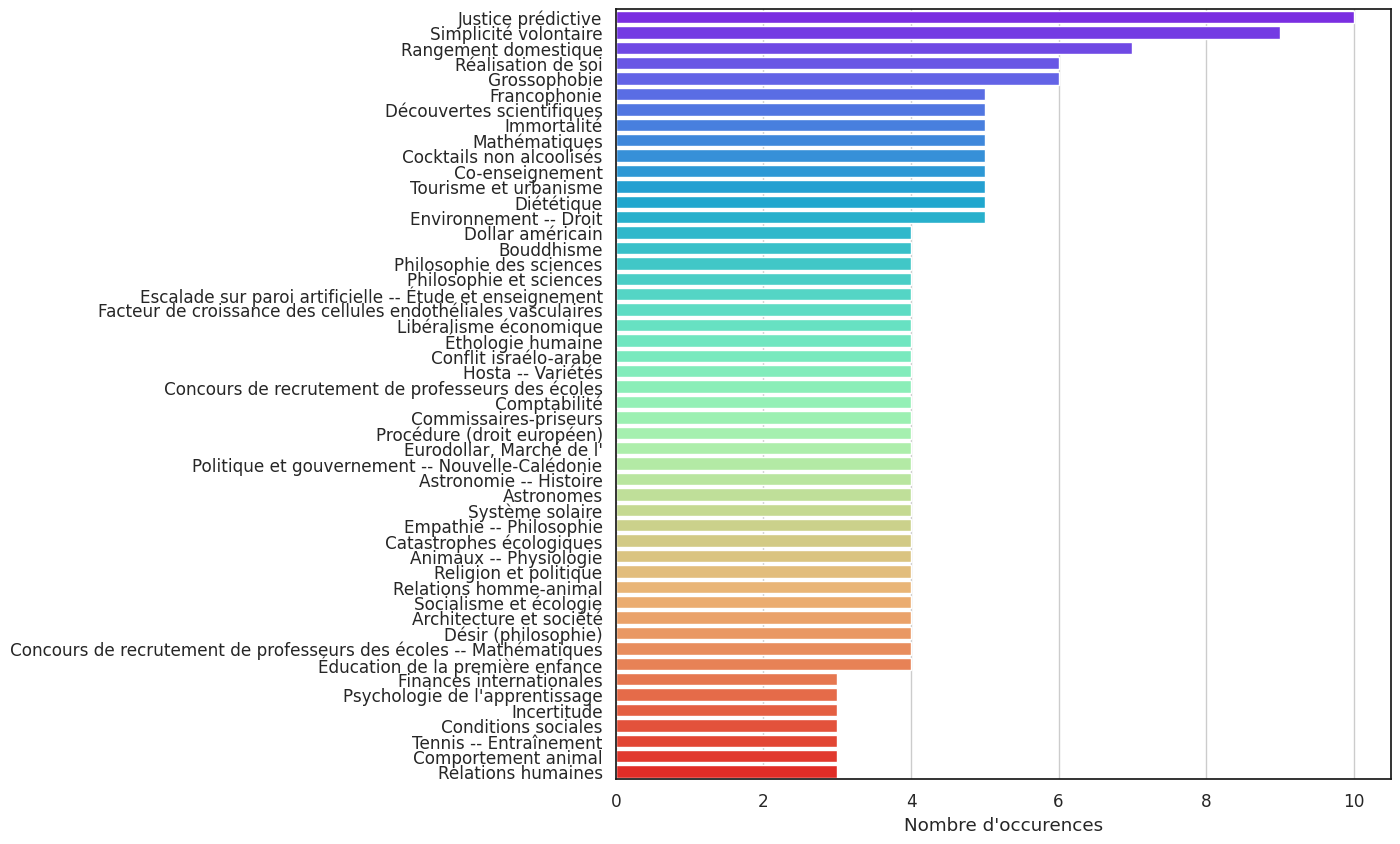

In [61]:
plot_barplot_of_tags(
    index_chains,
    nb_of_tags=50,
    xlabel="Nombre d'occurences",
    ylabel="",
    figsave="barplot_indexationChains_reindexation.png",
    figsize=(10, 10),
    palette="rainbow",
    orient="h",
)

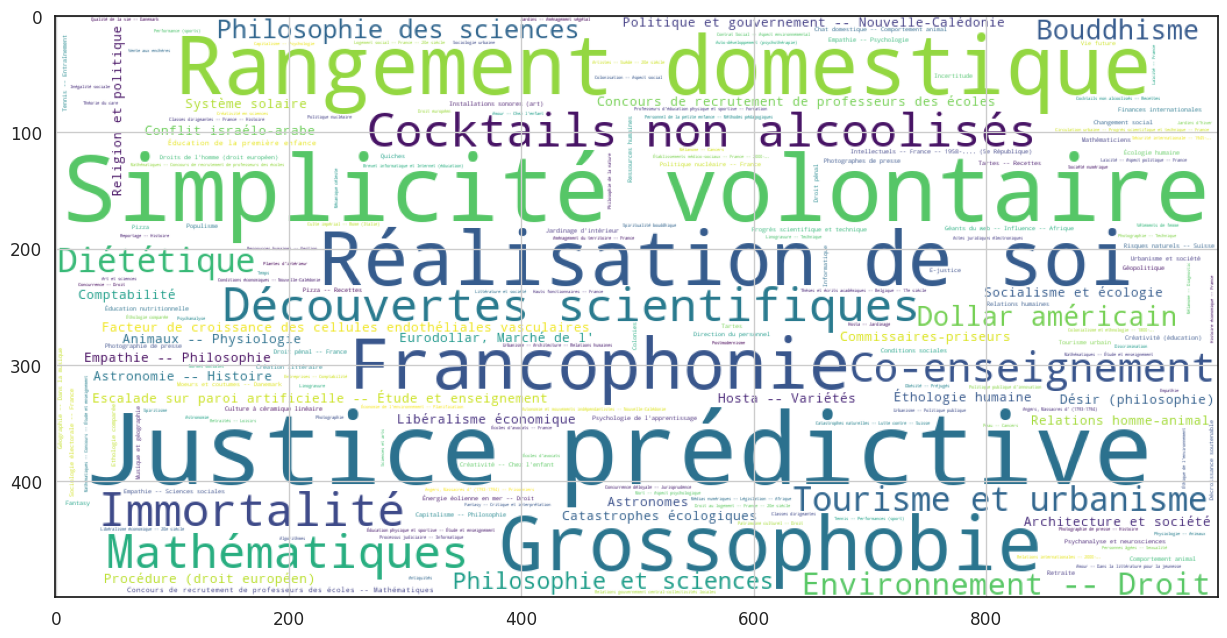

In [62]:
plot_wordcloud(
    index_chains,
    backgound_color="white",
    figsize=(15, 8),
    width=1000,
    height=500,
    save_file="wordcloud_index_chains_reindexation.png",
)

In [63]:
all_chains = df["rameau_chaines_index"] + df["rameau_index_chain_AFE"] + df["rameau_index_chain_MCR"] + df["rameau_index_chain_JMF"] + df["rameau_index_chain_LPL"] + df["rameau_index_chain_LJZ"]	+ df["rameau_index_chain_MPD"]
chains2 = flatten(all_chains)
print(f"Le dataset contient {len(set(chains2))} concepts RAMEAU differents")

Le dataset contient 1177 concepts RAMEAU differents


In [64]:
# Binarization
index_chains_rameau = mlb.fit_transform(all_chains) # all indexation chains
index_chains_rameau

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [65]:
sudoc = mlb.transform(df["rameau_chaines_index"])
afe = mlb.transform(df["rameau_index_chain_AFE"])
mcr = mlb.transform(df["rameau_index_chain_MCR"])
jmf = mlb.transform(df["rameau_index_chain_JMF"])
lpl = mlb.transform(df["rameau_index_chain_LPL"])
ljz = mlb.transform(df["rameau_index_chain_LJZ"])
mpd = mlb.transform(df["rameau_index_chain_MPD"])

In [66]:
from itertools import combinations_with_replacement

concept_list = [sudoc, afe, mcr, jmf, lpl, ljz, mpd]
index_name = ["sudoc", "afe", "mcr", "jmf", "lpl", "ljz", "mpd"]
result_chains = dict()

for names, concept in zip(list(combinations_with_replacement(index_name, 2)), list(combinations_with_replacement(concept_list, 2))):
    print(f"comparing {names[0]} and  {names[1]}")
    name = str(names[0] + '-' + names[1])
    result_chains[name] = label_metrics_report("reindexation_chains", concept[0], concept[1], zero_division=0)

comparing sudoc and  sudoc
comparing sudoc and  afe
comparing sudoc and  mcr
comparing sudoc and  jmf
comparing sudoc and  lpl
comparing sudoc and  ljz
comparing sudoc and  mpd
comparing afe and  afe
comparing afe and  mcr
comparing afe and  jmf
comparing afe and  lpl
comparing afe and  ljz
comparing afe and  mpd
comparing mcr and  mcr
comparing mcr and  jmf
comparing mcr and  lpl
comparing mcr and  ljz
comparing mcr and  mpd
comparing jmf and  jmf
comparing jmf and  lpl
comparing jmf and  ljz
comparing jmf and  mpd
comparing lpl and  lpl
comparing lpl and  ljz
comparing lpl and  mpd
comparing ljz and  ljz
comparing ljz and  mpd
comparing mpd and  mpd


### Dataframe of results

In [67]:
result_chains_df = pd.DataFrame(result_chains).T
result_chains_df

Hamming Loss Accuracy Precision - Macro Recall - Macro  \
sudoc-sudoc          0.0      1.0          0.192014       0.192014   
sudoc-afe       0.003347     0.03          0.019541       0.019541   
sudoc-mcr       0.003178     0.03           0.01062        0.01062   
sudoc-jmf       0.003704     0.01          0.022373        0.02294   
sudoc-lpl       0.003415     0.05          0.027188        0.02648   
sudoc-ljz       0.003662     0.01           0.02124        0.02124   
sudoc-mpd       0.003203     0.07          0.035259       0.035259   
afe-afe              0.0      1.0          0.174172       0.174172   
afe-mcr          0.00294     0.04          0.011895       0.011895   
afe-jmf         0.003483     0.02          0.021948        0.02294   
afe-lpl         0.003297     0.01          0.023789       0.023364   
afe-ljz         0.003152     0.01          0.034834       0.035684   
afe-mpd         0.002676     0.08          0.050552       0.050552   
mcr-mcr              0.0      1.0          0.139337       0.139337   
mcr-jmf         0.003449      0.0          0.007222       0.007647   
mcr-lpl         0.003331      0.0          0.004248       0.003823   
mcr-ljz         0.003373      0.0          0.007647       0.007647   
mcr-mpd         0.003067     0.02          0.013594       0.013594   
jmf-jmf              0.0      1.0          0.214953       0.214953   
jmf-lpl         0.003789     0.01          0.020391       0.019966   
jmf-ljz         0.003832     0.01           0.02209       0.021807   
jmf-mpd         0.003475     0.03          0.030586       0.029453   
lpl-lpl              0.0      1.0          0.195412       0.195412   
lpl-ljz         0.003679     0.01          0.021665        0.02209   
lpl-mpd         0.003016     0.04          0.045879       0.045879   
ljz-ljz              0.0      1.0          0.206457       0.206457   
ljz-mpd         0.003381     0.02           0.03271       0.032285   
mpd-mpd              0.0      1.0          0.191164       0.191164   

            F1_Score - Macro Jaccard - Macro Precision - Sample  \
sudoc-sudoc         0.192014        0.192014                1.0   
sudoc-afe           0.019541        0.019541              0.135   
sudoc-mcr           0.010479        0.010195               0.08   
sudoc-jmf           0.022515        0.022373           0.113333   
sudoc-lpl           0.026735         0.02648           0.158333   
sudoc-ljz            0.02124         0.02124           0.106667   
sudoc-mpd           0.035118        0.034834           0.211667   
afe-afe             0.174172        0.174172                1.0   
afe-mcr             0.011895        0.011895           0.098333   
afe-jmf             0.022232        0.021948           0.126667   
afe-lpl             0.023506        0.023364           0.133333   
afe-ljz             0.035118        0.034834           0.159167   
afe-mpd             0.050411        0.050127           0.286667   
mcr-mcr             0.139337        0.139337                1.0   
mcr-jmf             0.007363        0.007222           0.038333   
mcr-lpl             0.003965        0.003823           0.023333   
mcr-ljz             0.007647        0.007647           0.033333   
mcr-mpd             0.013594        0.013594           0.073333   
jmf-jmf             0.214953        0.214953                1.0   
jmf-lpl             0.020108        0.019966              0.115   
jmf-ljz              0.02192        0.021807              0.125   
jmf-mpd              0.02985        0.029453           0.193333   
lpl-lpl             0.195412        0.195412                1.0   
lpl-ljz             0.021807        0.021665                0.1   
lpl-mpd             0.045879        0.045879           0.241667   
ljz-ljz             0.206457        0.206457                1.0   
ljz-mpd             0.032427        0.032144           0.196667   
mpd-mpd             0.191164        0.191164                1.0   

            Recall - Sample F1_Score 

In [68]:
# Get max score
result_chains_df.sort_values(by="Hamming Loss")

Hamming Loss Accuracy Precision - Macro Recall - Macro  \
sudoc-sudoc          0.0      1.0          0.192014       0.192014   
ljz-ljz              0.0      1.0          0.206457       0.206457   
lpl-lpl              0.0      1.0          0.195412       0.195412   
jmf-jmf              0.0      1.0          0.214953       0.214953   
afe-afe              0.0      1.0          0.174172       0.174172   
mcr-mcr              0.0      1.0          0.139337       0.139337   
mpd-mpd              0.0      1.0          0.191164       0.191164   
afe-mpd         0.002676     0.08          0.050552       0.050552   
afe-mcr          0.00294     0.04          0.011895       0.011895   
lpl-mpd         0.003016     0.04          0.045879       0.045879   
mcr-mpd         0.003067     0.02          0.013594       0.013594   
afe-ljz         0.003152     0.01          0.034834       0.035684   
sudoc-mcr       0.003178     0.03           0.01062        0.01062   
sudoc-mpd       0.003203     0.07          0.035259       0.035259   
afe-lpl         0.003297     0.01          0.023789       0.023364   
mcr-lpl         0.003331      0.0          0.004248       0.003823   
sudoc-afe       0.003347     0.03          0.019541       0.019541   
mcr-ljz         0.003373      0.0          0.007647       0.007647   
ljz-mpd         0.003381     0.02           0.03271       0.032285   
sudoc-lpl       0.003415     0.05          0.027188        0.02648   
mcr-jmf         0.003449      0.0          0.007222       0.007647   
jmf-mpd         0.003475     0.03          0.030586       0.029453   
afe-jmf         0.003483     0.02          0.021948        0.02294   
sudoc-ljz       0.003662     0.01           0.02124        0.02124   
lpl-ljz         0.003679     0.01          0.021665        0.02209   
sudoc-jmf       0.003704     0.01          0.022373        0.02294   
jmf-lpl         0.003789     0.01          0.020391       0.019966   
jmf-ljz         0.003832     0.01           0.02209       0.021807   

            F1_Score - Macro Jaccard - Macro Precision - Sample  \
sudoc-sudoc         0.192014        0.192014                1.0   
ljz-ljz             0.206457        0.206457                1.0   
lpl-lpl             0.195412        0.195412                1.0   
jmf-jmf             0.214953        0.214953                1.0   
afe-afe             0.174172        0.174172                1.0   
mcr-mcr             0.139337        0.139337                1.0   
mpd-mpd             0.191164        0.191164                1.0   
afe-mpd             0.050411        0.050127           0.286667   
afe-mcr             0.011895        0.011895           0.098333   
lpl-mpd             0.045879        0.045879           0.241667   
mcr-mpd             0.013594        0.013594           0.073333   
afe-ljz             0.035118        0.034834           0.159167   
sudoc-mcr           0.010479        0.010195               0.08   
sudoc-mpd           0.035118        0.034834           0.211667   
afe-lpl             0.023506        0.023364           0.133333   
mcr-lpl             0.003965        0.003823           0.023333   
sudoc-afe           0.019541        0.019541              0.135   
mcr-ljz             0.007647        0.007647           0.033333   
ljz-mpd             0.032427        0.032144           0.196667   
sudoc-lpl           0.026735         0.02648           0.158333   
mcr-jmf             0.007363        0.007222           0.038333   
jmf-mpd              0.02985        0.029453           0.193333   
afe-jmf             0.022232        0.021948           0.126667   
sudoc-ljz            0.02124         0.02124           0.106667   
lpl-ljz             0.021807        0.021665                0.1   
sudoc-jmf           0.022515        0.022373           0.113333   
jmf-lpl             0.020108        0.019966              0.115   
jmf-ljz              0.02192        0.021807              0.125   

            Recall - Sample F1_Score 

### Plot

In [69]:
# Plot results
metrics_radar_plot(
    result_chains_df,
    title="Quantitative comparisons, Chains indexation, Scaled, without identity",
    savefig="metrics_reindexation_Chains_without_identity.html",)

## Bag of words (tf-idf or CountVectorizer)

In [68]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

### tfID vectorizer

In [69]:
def identity_tokenizer(text):
    return text
vectorizer = TfidfVectorizer(tokenizer=identity_tokenizer, ngram_range=(1,3), lowercase=False)

In [70]:
labels

0      [Dollar américain, Finances internationales, P...
1                [Intellectuels, Intellectuels français]
2                                           [Bouddhisme]
3      [Mathématiques, Étude et enseignement, Aspect ...
4      [Chaos (théorie des systèmes), Incertitude, Li...
                             ...                        
751    [Éducation physique et sportive, Étude et ense...
752    [Société numérique, Algorithmes, Utilisation, ...
753    [Capitalisme, Critique et interprétation, Dési...
754                                    [Co-enseignement]
755                              [Jardinage d'intérieur]
Name: value, Length: 756, dtype: object

In [71]:
# Vectorization
vectorised_concepts = vectorizer.fit_transform(labels)
autorites = vectorizer.get_feature_names_out()
autorites

/home/aurelie/anaconda3/envs/abes_index/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



array([' Le Lazzaro (Calvados ; site archéologique)',
       '1500-.... (Période moderne)',
       '1500-.... (Période moderne) France', ...,
       'Île-de-France (France) 1945-1970',
       "Île-de-France (France) 1945-1970 Constructions d'urgence",
       'Île-de-France (France) 1945-1970 Habitations individuelles'],
      dtype=object)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

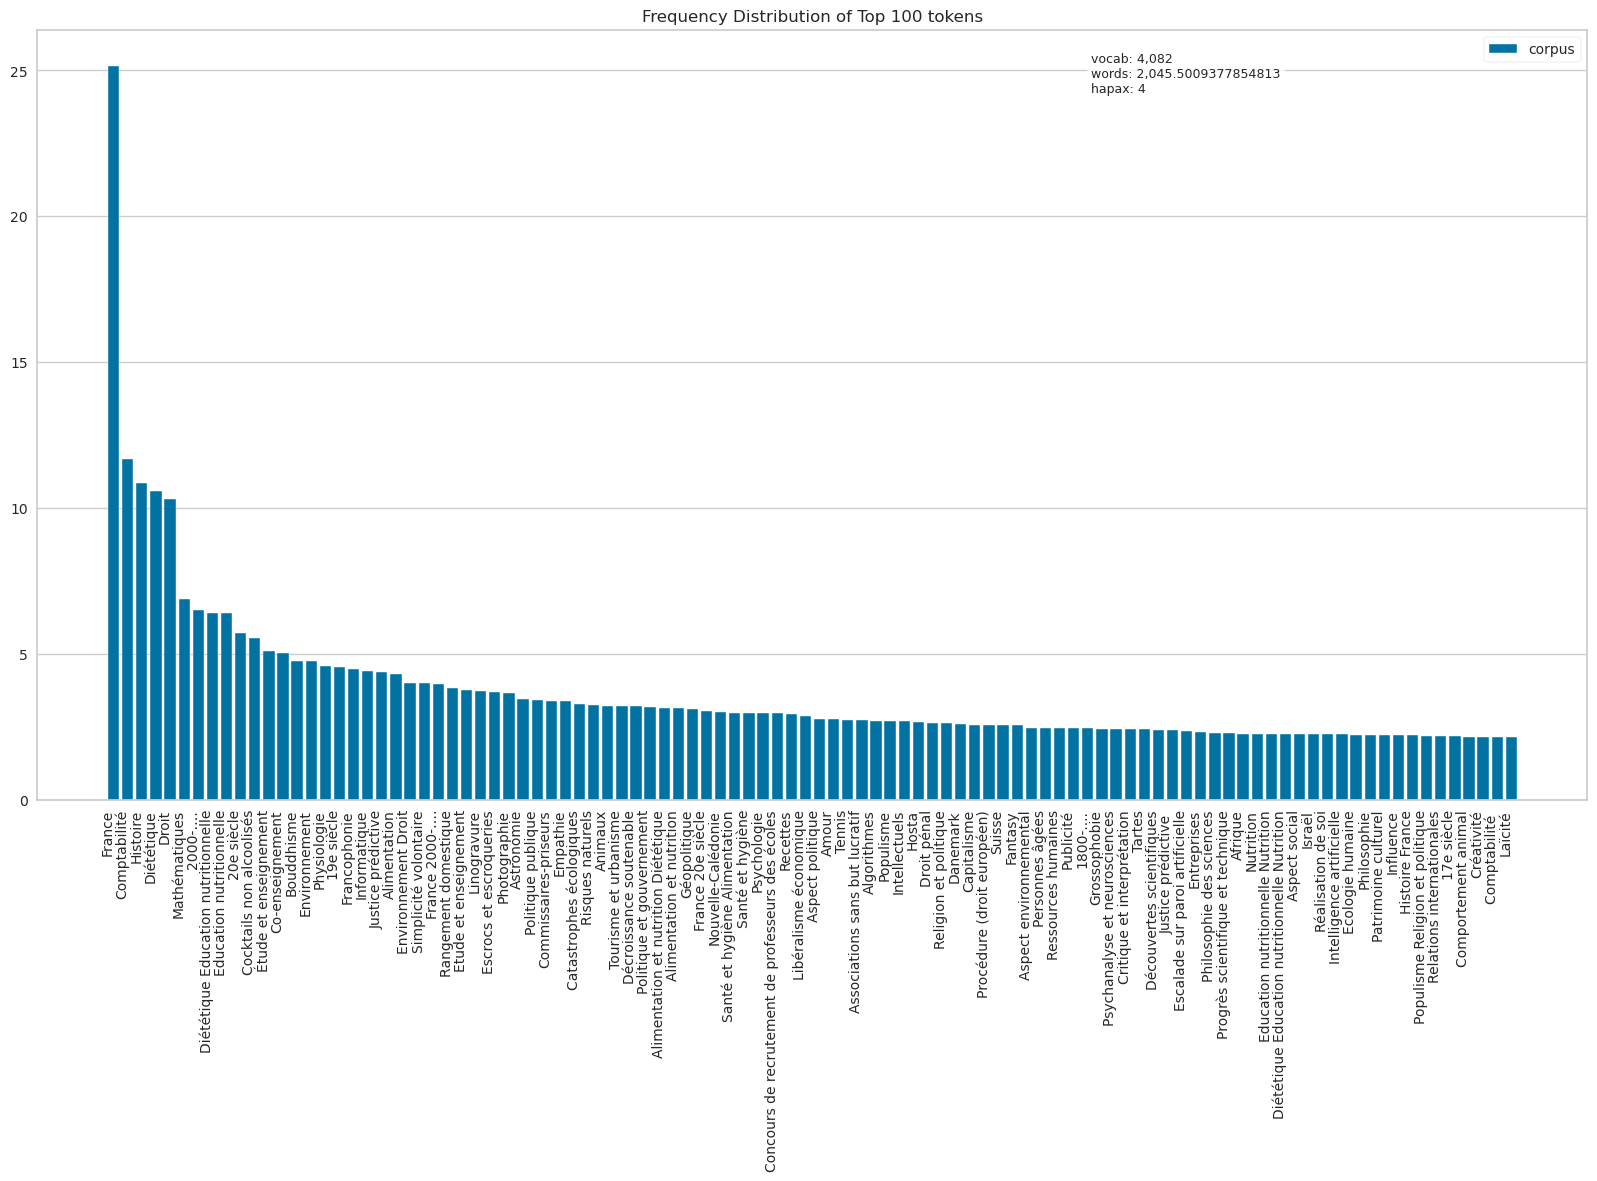

<Axes: title={'center': 'Frequency Distribution of Top 100 tokens'}>

In [72]:
from yellowbrick.text import FreqDistVisualizer
plt.figure(figsize=(20, 10))
features = vectorizer.get_feature_names_out()
visualizer = FreqDistVisualizer(features=features, n=100, orient="v")
visualizer.fit(vectorised_concepts)
visualizer.show()

In [73]:
# Visualize the dataset with T-SNE
from yellowbrick.text import TSNEVisualizer
tsne = TSNEVisualizer()
tsne.fit(vectorised_concepts, df_pivot["variable"])
tsne.show()

### Count vectorizer

In [ ]:
vectorizer = CountVectorizer(tokenizer=identity_tokenizer, ngram_range=(1,3), lowercase=False)
vectorised_concepts = vectorizer.fit_transform(df_pivot["value"])

/home/aurelie/anaconda3/envs/abes_index/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [ ]:
# Vectorization
vectorised_concepts = vectorizer.fit_transform(labels, df_pivot["variable"])
autorites = vectorizer.get_feature_names_out()
autorites

/home/aurelie/anaconda3/envs/abes_index/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



array(['', ' Le Lazzaro (Calvados ; site archéologique)',
       '1500-.... (Période moderne)', ...,
       'Île-de-France (France) 1945-1970',
       "Île-de-France (France) 1945-1970 Constructions d'urgence",
       'Île-de-France (France) 1945-1970 Habitations individuelles'],
      dtype=object)

In [ ]:
vectorised_concepts

<770x4242 sparse matrix of type '<class 'numpy.int64'>'
	with 6618 stored elements in Compressed Sparse Row format>

In [ ]:
from yellowbrick.text import TSNEVisualizer
tsne = TSNEVisualizer()
tsne.fit(vectorised_concepts, df_pivot["variable"])
tsne.show()

## Test kmeans


In [ ]:
# Select columns to use
concept_cols = [
    "rameau_concepts", "rameau_concept_AFE", "rameau_concept_MCR",
    "rameau_concept_JMF", "rameau_concept_LPL", "rameau_concept_LJZ",
    "rameau_concept_MPD"]
df_for_analysis = df[concept_cols]
labels_encoded = pd.DataFrame(mlb.fit_transform(flatten(df_pivot["value"])))

In [ ]:
labels_encoded

0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
0      0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1      1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2      1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3      1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4      1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
3126   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3127   1   0   0   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   
3128   1   0   0   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   
3129   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   
3130   1   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

      18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  \
0      0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1      0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   
2      0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   
3      0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   
4      0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
3126   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   
3127   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   
3128   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3129   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   
3130   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   

      36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  \
0      0   0   0   0   0   0   0   0   1   0   1   0   1   0   0   0   1   0   
1      0   0   0   0   0   0   0   0   1   0   0   1   1   0   1   0   1   0   
2      0   0   0   0   0   0   0   0   1   0   0   1   1   0   1   0   1   0   
3      0   0   0   0   0   0   0   0   1   0   1   0   1   1   0   0   1   0   
4      0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   1   0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
3126   0   0   0   0   0   0   0   0   1   0   0   0   1   0   0   0   1   0   
3127   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   1   1   0   
3128   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   1   1   0   
3129   0   0   0   0   0   0   0   0   0   0   0   0   1   0   1   0   1   0   
3130   0   0   0   0   0   0   0   0   1   0   0   1   1   0   1   0   1   0   

      54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  \
0      0   0   0   0   0   0   0   1   0   1   1   0   0   0   0   0   0   0   
1      0   1   0   1   0   0   0   1   1   1   0   0   0   0   0   0   0   0   
2      0   1   0   1   0   0   0   1   1   1   0   0   0   0   0   0   0   0   
3      0   0   0   1   1   0   0   1   1   1   1   0   0   0   0   0   0   0   
4      0   1   1   0   1   1   1   0   1   1   1   0   0   0   0   0   0   0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
3126   0   0   0   1   1   1   1   1   0   1   1   0   0   0   0   0   0   0   
3127   0   1   0   0   1   1   0   1   1   0   0   0   0   0   0   0   0   0   
3128   0   1   0   1   1   1   0   0   1   0   0   0   0   0   0   0   0   0   
3129   0   0   1   1   1   0   0   0   1   1   0   0   0   0   0   0   0   0   
3130   0   0   0   1   0   0   0   1   0   1   1   0   0   0   0   0   0   0   

      72  73  74  75  76  77  78  79  80  81  82  83  
0      0   0   0   0   0   0   0   0   0   0   0   0  
1      0   0   0   0   0   0   0   0   0   0   0   0

In [ ]:
len(labels_encoded), len(labels_encoded[0])

(3131, 3131)

In [ ]:
# Clustering based on Kmeans
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [ ]:
# test different clusters
sil = []
davis_bouldin = []
sum_of_squared_distances = []
param_range = range(3,80)
for k in param_range:
    print(f"Clustering with {k} groups")
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(labels_encoded)
    labels = kmeans.labels_
    sum_of_squared_distances.append(kmeans.inertia_)
    silh = silhouette_score(
        labels_encoded, labels, metric="euclidean", sample_size=50000, random_state=200
        )
    dav = davies_bouldin_score(labels_encoded, labels)
    sil.append(silh)
    davis_bouldin.append(dav)

Clustering with 3 groups
Clustering with 4 groups
Clustering with 5 groups
Clustering with 6 groups
Clustering with 7 groups
Clustering with 8 groups
Clustering with 9 groups
Clustering with 10 groups
Clustering with 11 groups
Clustering with 12 groups
Clustering with 13 groups
Clustering with 14 groups
Clustering with 15 groups
Clustering with 16 groups
Clustering with 17 groups
Clustering with 18 groups
Clustering with 19 groups
Clustering with 20 groups
Clustering with 21 groups
Clustering with 22 groups
Clustering with 23 groups
Clustering with 24 groups
Clustering with 25 groups
Clustering with 26 groups
Clustering with 27 groups
Clustering with 28 groups
Clustering with 29 groups
Clustering with 30 groups
Clustering with 31 groups
Clustering with 32 groups
Clustering with 33 groups
Clustering with 34 groups
Clustering with 35 groups
Clustering with 36 groups
Clustering with 37 groups
Clustering with 38 groups
Clustering with 39 groups
Clustering with 40 groups
Clustering with 41 

In [ ]:
# Find optimal values accordin to silhouette and Davis-Bouldin scores
opt_val_sil = param_range[sil.index(max(sil))]
opt_val_db = param_range[davis_bouldin.index(min(davis_bouldin))]

In [ ]:
def plot_metrics(
    sil, davis_bouldin, param_name, param_range, silhouette_color="red", db_color="blue"
):
    """
    Plot the silhouette score and davies_bouldin score for a range of cluster number.

    Parameters:
    -----------
        - sil (list): list of silhouette scores for all values of hyper-parameter range
        - davis_bouldin (list): list of davies-bouldin scores along hyper-parameter range
        - param_name (str): name of the hyper-parameter to be fined-tuned
        - param_range (list) : range of possible values for hyper-parameter tuning
        - silhouette_color (str): color for the silhouette score (defaut: 'red')
        - db_color (str): color for the silhouette score (defaut: 'blue')

    Returns :
    ---------
        - Evolution of silhouette and Davies-bouldin scores along hyper-parameter range
    """

    # plot
    _, ax1 = plt.subplots()
    ax1.set_xlabel(param_name)
    ax1.set_ylabel("Silhouette_score", color=silhouette_color)
    ax1.plot(param_range, sil, color=silhouette_color)
    ax1.tick_params(axis="y", labelcolor=silhouette_color)

    # Adding Twin Axes
    ax2 = ax1.twinx()
    ax2.set_ylabel("Davies_bouldin", color=db_color)
    ax2.plot(param_range, davis_bouldin, color=db_color)
    ax2.tick_params(axis="y", labelcolor=db_color)

    # Show plot
    plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

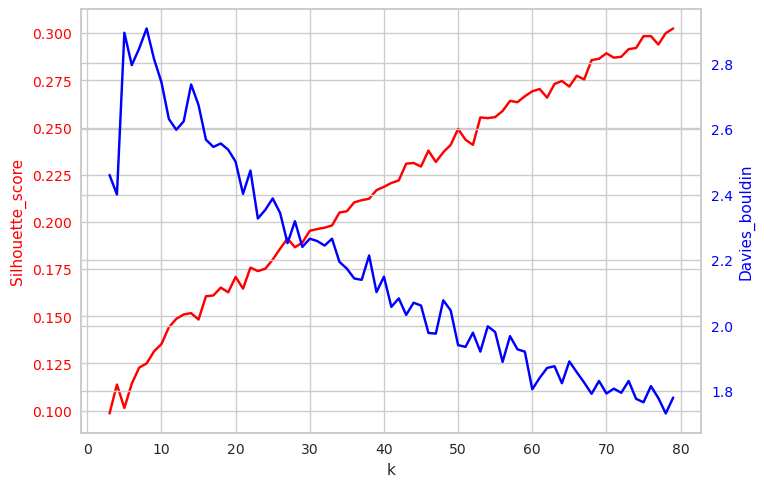

In [ ]:
plot_metrics(sil, davis_bouldin, param_name="k", param_range=param_range, silhouette_color="red", db_color="blue")

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

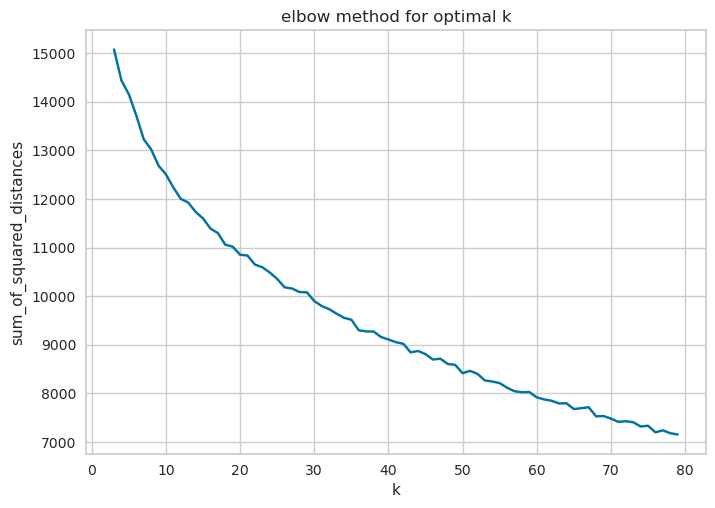

In [ ]:
# Plot inertia
plt.plot(param_range, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()

In [ ]:
# Best clustering
#k = opt_val_sil
k = 100
kmeans = KMeans(n_clusters=k)
kmeans.fit(labels_encoded)

KMeans(n_clusters=100)

Graph des Silhouettes



findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

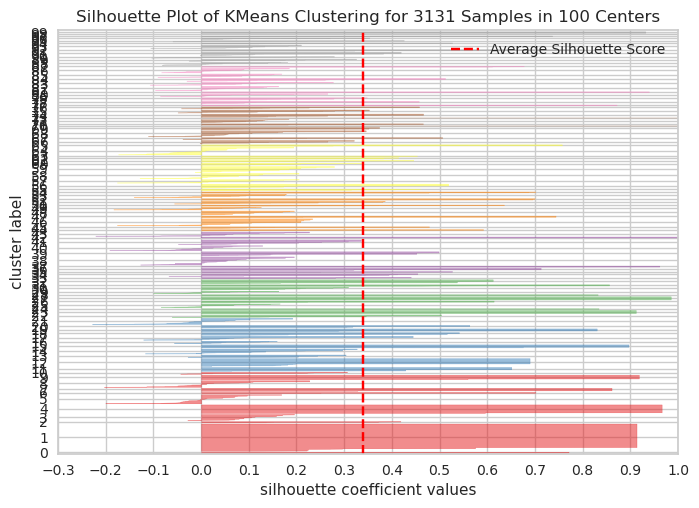

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 3131 Samples in 100 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Graph des silhouettes
from yellowbrick.cluster import SilhouetteVisualizer
print("Graph des Silhouettes\n")
silhouette_vis = SilhouetteVisualizer(kmeans)
silhouette_vis.fit(labels_encoded)
silhouette_vis.poof()

In [ ]:
# Plot clusters
# Fit visualisation pipeline
import sklearn
from sklearn.manifold import TSNE
tsne =  TSNE(init="pca").fit_transform(labels_encoded)

: 

: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

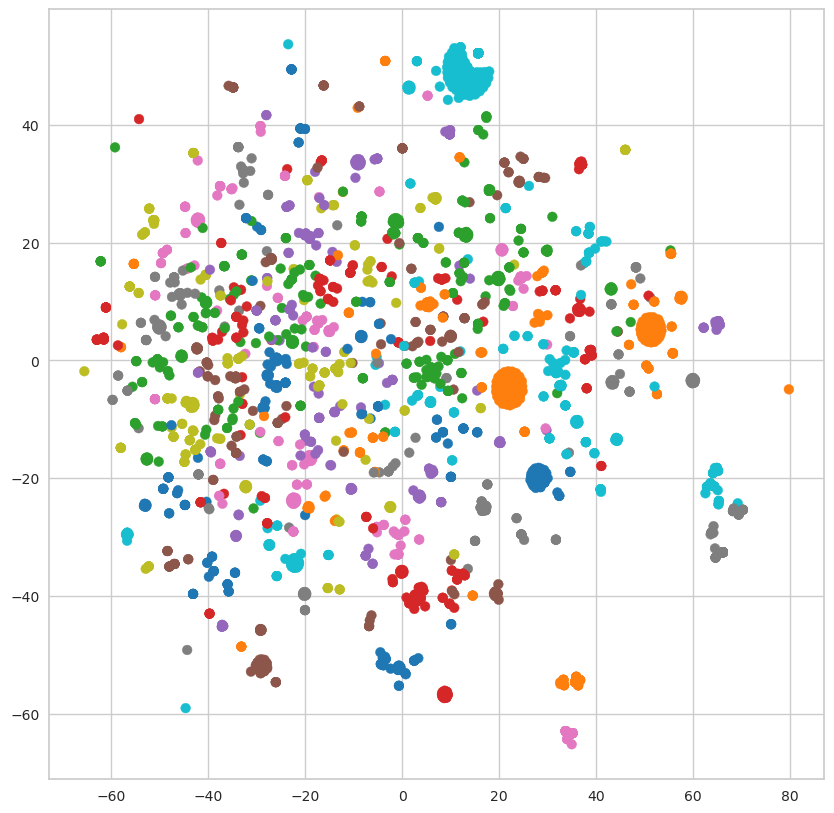

In [ ]:
# Plot TSNE
plt.figure(figsize=(10, 10))
axe = plt.axes()
clusters = kmeans.labels_
num_classes = k
palette = np.array(sns.color_palette("tab10", num_classes))
axe.scatter(x=tsne[:, 0], y=tsne[:, 1], c=palette[clusters.astype(int)])
plt.legend()